<a href="https://colab.research.google.com/github/granularus/Vernal-Equinox/blob/main/Vernal_Equinox_ASRI_Summer_School_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Julian Day Numbers.** 

Since I only plan to use Gregorian dates, I did not put in code to test the date for the Julian Calendar.  It would be easy to do.  The floor functions yields the small integer not larger than its argument.  This is used to calculate the required integer values in the JD formula.

The Formula:

If $MM>2$ then $y=YYYY$ and $m=MM$; if $MM=1\
 or\ 2$, $y=YYYY-1$ and $m=MM+12$
If $YYYY.MMDDdd$ is equal to or larger than $1582.1015$ then
$A=int(y/100)$ and $B=2-A +int(A/4)$
If $YYYYMMDDdd<1582.1015$, $B=0$
The Julian day is then
$JD=int(365.25y)+int(30.601(m+1))+DD.dd+1720994.5+B$

B accounts for dates in the Gregorian Calendar


In [ ]:
import math as mt
YYYY=1890
MM=3
DDdd=20.653368056
y=YYYY
m=MM
a=mt.floor(y/100)
b=2-a+mt.floor(a/4)
JD=mt.floor(365.25*y)+mt.floor(30.6001*(m+1))+DDdd+1720994.5

JD=JD+b
print(JD)

2411447.153368056


**We now find the dates of the vernal equinoxes**


Next we find the Julian Day numbers of the vernal equinoxes. After that, those Julian day numbers are converted to Calendar dates and are written to a list.

We also need to know how to convert JD back to calendar dates.  Here's how:

From $JD+0.5$, let $Z$ be the integer part and F the fractional (decimal) part of $JD+0.5$.  If $Z<2299161$ then $A=Z$. If $Z\geq 229961$ then,

$\alpha=\textrm{int}\left(\frac{Z-1867216.25}{36524.25}\right)$ and $A=Z+1+\alpha-\textrm{int}\left(\frac{\alpha}{4}\right)$

Then

$B=A+1524$, $C=\textrm{int}\left(\frac{B-122.1}{365.25}\right)$

$D=\textrm{int}(365.25\ C)$ and $E=\textrm{int}\left(\frac{B-D}{30.6001}\right)$

The day of the month with decimals is then

$B-D-\textrm{int}(30.6001\ E)+F$

The month number m is then $E-1$ if $E\lt13.5$ and $E-13$ if $E\gt13
.5$

The year is

$C-4716$ if $m\gt2.5$ and $C-4715$ if $m\lt2.5$

The code is below.

In summary, I open three empty lists, I set a range, I calculate all the terms, I append the results to the appropriat lists, I add a tropical year, and I do it all again!
I only print the days and years because I know the reult will always lie in March.  But we could add that in.


In [ ]:
TY=365.242199
Days=[]
Months=[]
Years=[]
for i in range (0,121):
    Z=mt.floor(JD+0.5)
    F=JD+0.5-Z
    alpha=mt.floor((Z-1867216.25)/36524.25)
    A=Z+1+alpha-mt.floor(alpha/4)
    B=A+1524
    C=mt.floor((B-122.1)/365.25)
    D=mt.floor(365.25*C)
    E=mt.floor((B-D)/30.6001)
    Day=B-D-mt.floor(30.6001*E)+F
    if E<13.5:
        Month=E-1
    elif E>13.5:
        Month=E-13
    if Month>2.5:
        Year=C-4716
    elif Month<2.5:
        Year=C-4715
    Days.append(Day)
    Months.append(Month)
    Years.append(Year)
    print(i, JD, Day, Month, Year)
    JD=JD+TY
#print(Days)
#print(Years)


0 2411447.153368056 20.653368055820465 3 1890
1 2411812.395567056 20.895567055791616 3 1891
2 2412177.6377660558 20.137766055762768 3 1892
3 2412542.8799650557 20.37996505573392 3 1893
4 2412908.1221640557 20.62216405570507 3 1894
5 2413273.3643630557 20.864363055676222 3 1895
6 2413638.6065620556 20.106562055647373 3 1896
7 2414003.8487610556 20.348761055618525 3 1897
8 2414369.0909600556 20.590960055589676 3 1898
9 2414734.3331590556 20.833159055560827 3 1899
10 2415099.5753580555 21.07535805553198 3 1900
11 2415464.8175570555 21.31755705550313 3 1901
12 2415830.0597560555 21.55975605547428 3 1902
13 2416195.3019550554 21.801955055445433 3 1903
14 2416560.5441540554 21.044154055416584 3 1904
15 2416925.7863530554 21.286353055387735 3 1905
16 2417291.0285520554 21.528552055358887 3 1906
17 2417656.2707510553 21.770751055330038 3 1907
18 2418021.5129500553 21.01295005530119 3 1908
19 2418386.7551490553 21.25514905527234 3 1909
20 2418751.9973480552 21.497348055243492 3 1910
21 2419117.


We will now plot our results, this is the command for a simple plot. I used the usual method of shortening the name and specifying where the commants are take from.


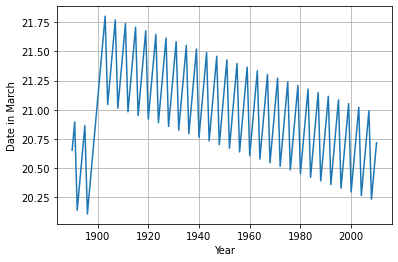

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Years, Days)
plt.xlabel('Year')
plt.ylabel('Date in March')
plt.grid(True)
plt.show()

Here is everything assembled into a single code, I have removed or commented the print statements and I have introduce the variable span to set the range of years across which the calculations are performed.

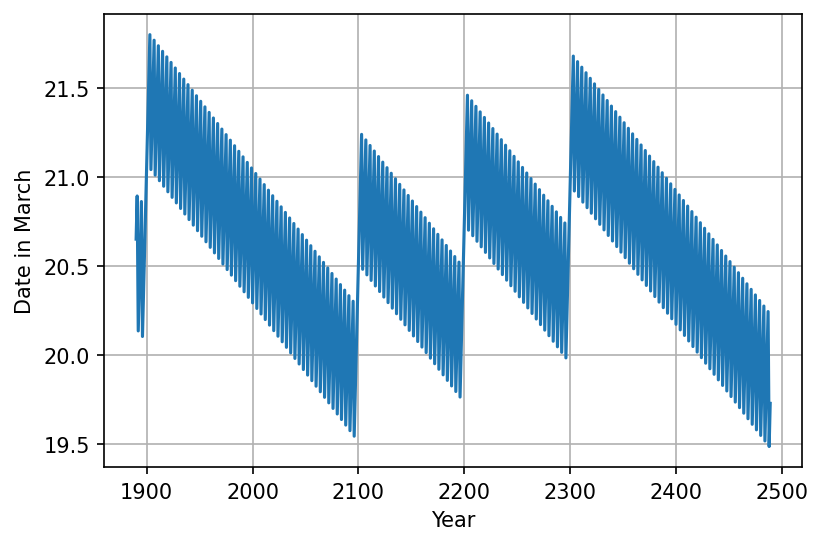

In [ ]:
import math as mt
span=600
YYYY=1890
MM=3
DDdd=20.653368056
y=YYYY
m=MM
a=mt.floor(y/100)
b=2-a+mt.floor(a/4)
JD=mt.floor(365.25*y)+mt.floor(30.6001*(m+1))+DDdd+1720994.5
JD=JD+b
TY=365.242199
Days=[]
Months=[]
Years=[]
for i in range (0,span):
    Z=mt.floor(JD+0.5)
    F=JD+0.5-Z
    alpha=mt.floor((Z-1867216.25)/36524.25)
    A=Z+1+alpha-mt.floor(alpha/4)
    B=A+1524
    C=mt.floor((B-122.1)/365.25)
    D=mt.floor(365.25*C)
    E=mt.floor((B-D)/30.6001)
    Day=B-D-mt.floor(30.6001*E)+F
    if E<13.5:
        Month=E-1
    elif E>13.5:
        Month=E-13
    if Month>2.5:
        Year=C-4716
    elif Month<2.5:
        Year=C-4715
    Days.append(Day)
    Months.append(Month)
    Years.append(Year)
  #  print(i, JD, Day, Month, Year)
    JD=JD+TY
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150 #line added to increase plotsize
plt.plot(Years, Days)
#plt.scatter(Years, Days) #line added to show data points
plt.xlabel('Year')
plt.ylabel('Date in March')
plt.grid(True)
###The next three lines are specific to downloading an image from Google Colab
#from google.colab import files
#plt.savefig("plotequinoxes.png")
#files.download("plotequinoxes.png") 
###### These lines must appear before the plt.show() command
plt.show()
